In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [171]:
data1 = pd.read_csv('data/makan.csv')
data2 = pd.read_csv('data/mam.csv')
data3 = pd.read_csv('data/programmams.csv')

In [2]:
from datasets import load_dataset

ds = load_dataset("w11wo/twitter_indonesia_sarcastic")

In [4]:
print(ds)

DatasetDict({
    train: Dataset({
        features: ['tweet', 'label'],
        num_rows: 1878
    })
    validation: Dataset({
        features: ['tweet', 'label'],
        num_rows: 268
    })
    test: Dataset({
        features: ['tweet', 'label'],
        num_rows: 538
    })
})


In [5]:
data_train = ds['train'].to_pandas()
data_validation = ds['validation'].to_pandas()
data_test = ds['test'].to_pandas()

In [175]:
data = pd.concat([data1, data2, data3], ignore_index=True)

In [6]:
data_sarkas = pd.concat([data_train, data_validation, data_test], ignore_index=True)

In [177]:
data.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1883189741312684380,Sat Jan 25 16:26:36 +0000 2025,0,Daripada makan siang gratis mendingan ini.,1883189741312684380,NaN,NaN,in,"Banten, Indonesia",0,0,0,https://x.com/finidebriani/status/188318974131...,83586867,finidebriani
1,1883086569915232560,Sat Jan 25 16:16:05 +0000 2025,0,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,1883187091938681249,NaN,vernonsipil,in,NaN,0,0,0,https://x.com/WhiteTigerXR/status/188318709193...,1856386235268530176,WhiteTigerXR
2,1883003041932300417,Sat Jan 25 16:07:31 +0000 2025,0,@idextratime makanya itu anggaran dituruninnya...,1883184937186246738,NaN,idextratime,in,NaN,0,0,0,https://x.com/smaskots/status/1883184937186246738,1158288381631090688,smaskots
3,1883184703953613092,Sat Jan 25 16:06:35 +0000 2025,0,Jadi karyawan di industri Cikarang dapat makan...,1883184703953613092,NaN,NaN,in,NaN,0,0,0,https://x.com/annartelier/status/1883184703953...,1531300105844068353,annartelier
4,1882806044201750794,Sat Jan 25 15:58:57 +0000 2025,0,@excettra Jangan jangan diambil abang ya makan...,1883182780517081290,NaN,excettra,in,NaN,0,1,0,https://x.com/Licelalissa/status/1883182780517...,2562463639,Licelalissa


In [178]:
data_sarkas.head()

,tweet,label
0,<username> <username> <username> <username> <u...,0
1,Beneran pengen tau tanggapan mereka . <usernam...,0
2,Anda anggota DPRD lama <username> tapi mungkin...,0
3,<username> <username> Sekali sekali dea pengen...,0
4,Kamu tau tidak..? Pasti tidak .. Goblok kamu m...,0


In [179]:
data.tail()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
12466,1849373172531077573,Thu Oct 24 13:22:22 +0000 2024,0,@inilahdotcom Usaha ini akan pulih sebentar la...,1849441303781925012,NaN,inilahdotcom,in,NaN,0,0,0,https://x.com/__nyai__/status/1849441303781925012,710653443287994369,__nyai__
12467,1849438330183733325,Thu Oct 24 13:10:33 +0000 2024,3,Status program makan siang gratis itu sumber d...,1849438330183733325,NaN,NaN,in,Any where any place,1,0,1,https://x.com/Nndraee07/status/184943833018373...,1521967420889477121,Nndraee07
12468,1849436318918733865,Thu Oct 24 13:02:33 +0000 2024,0,Pemkab Bima Tunggu Petunjuk Teknik tentang Pro...,1849436318918733865,NaN,NaN,in,"Nusa Tenggara Barat, Indonesia",0,0,1,https://x.com/IDNTimesNTB/status/1849436318918...,1318858445940875264,IDNTimesNTB
12469,1849435458297864663,Thu Oct 24 12:59:08 +0000 2024,1,Program Makan Siang Bergizi Gratis di Sumbar B...,1849435458297864663,NaN,NaN,in,"Sumatera Selatan, Indonesia",0,0,1,https://x.com/IDNTimesSumsel/status/1849435458...,1318860486759182336,IDNTimesSumsel
12470,1849340163518079036,Thu Oct 24 12:45:29 +0000 2024,0,@Sagita81774027 Pak @prabowo masih tetap mempe...,1849432021925540154,NaN,Sagita81774027,in,Indonesia,0,0,0,https://x.com/Gunawan53722139/status/184943202...,920096674227281920,Gunawan53722139


In [180]:
data_sarkas.tail()

,tweet,label
2141,Manies banget bercakap nya <hashtag>,1
2142,Yang masih nyinyir jangan selalu berfikir nega...,0
2143,Welcome to Indonesia dimana netizen lebih suka...,1
2144,Yang goblok tuh gua ato dia yang puraÃ‚Â² gata...,0
2145,Wajib 3 point ... <hashtag> <hashtag>,0


In [181]:
len(data)

12471

In [182]:
len(data_sarkas)

2146

In [184]:
data_mbg = data[['full_text']]

In [7]:
data_sarc = data_sarkas[data_sarkas['label'] == 1]

In [186]:
data_mbg.head()

,full_text
0,Daripada makan siang gratis mendingan ini.
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...
2,@idextratime makanya itu anggaran dituruninnya...
3,Jadi karyawan di industri Cikarang dapat makan...
4,@excettra Jangan jangan diambil abang ya makan...


In [8]:
data_sarc.head()

,tweet,label
6,Terimakasih atas pengkhianatan ini Terimakasih...,1
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,1
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,1
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,1
16,Buat para pembenci Selamat anda dipimpin oleh ...,1


In [189]:
data_mbg.tail()

,full_text
12466,@inilahdotcom Usaha ini akan pulih sebentar la...
12467,Status program makan siang gratis itu sumber d...
12468,Pemkab Bima Tunggu Petunjuk Teknik tentang Pro...
12469,Program Makan Siang Bergizi Gratis di Sumbar B...
12470,@Sagita81774027 Pak @prabowo masih tetap mempe...


In [190]:
data_sarc.tail()

,tweet,label
2117,"Knp jaman Ahok, KPK rajin nyadap? ðŸ™„ Mungkin...",1
2134,Sebelumnya saya hanya pakai 2 produk lokal .. ...,1
2139,<username> <username> <username> <username> <u...,1
2141,Manies banget bercakap nya <hashtag>,1
2143,Welcome to Indonesia dimana netizen lebih suka...,1


In [192]:
data_mbg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12471 entries, 0 to 12470
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   full_text  12471 non-null  object
dtypes: object(1)
memory usage: 97.6+ KB


In [193]:
data_sarc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 6 to 2143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   537 non-null    object
 1   label   537 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [195]:
data_mbg.isna().sum()

full_text    0
dtype: int64

In [9]:
data_sarc.isna().sum()

tweet    0
label    0
dtype: int64

In [198]:
data_mbg.duplicated().sum()

3302

In [10]:
data_sarc.duplicated().sum()

0

In [201]:
data_mbg.drop_duplicates(inplace=True)

C:\Users\UMMY\AppData\Local\Temp\ipykernel_18556\1239904523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mbg.drop_duplicates(inplace=True)


In [202]:
# Ubah nama kolom 'full_text' jadi 'tweet'
data_mbg = data_mbg.rename(columns={'full_text': 'tweet'})

In [203]:
data_mbg.head()

,tweet
0,Daripada makan siang gratis mendingan ini.
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...
2,@idextratime makanya itu anggaran dituruninnya...
3,Jadi karyawan di industri Cikarang dapat makan...
4,@excettra Jangan jangan diambil abang ya makan...


In [11]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\UMMY\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def clean_tweet(tweet):
    # Remove usernames after '@'
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove punctuation and special symbols (commas, periods, etc.)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove extra whitespace
    tweet = re.sub(r'\s+', ' ', tweet).strip()
    # Remove any zero-width characters like 'ㅤ'
    tweet = re.sub(r'[\u200B-\u200D\uFEFF\u3164]+', '', tweet)
    return tweet

In [206]:
data_mbg['tweet_cleaning'] = data_mbg['tweet'].apply(clean_tweet)

In [13]:
data_sarc['tweet_cleaning'] = data_sarc['tweet'].apply(clean_tweet)

C:\Users\UMMY\AppData\Local\Temp\ipykernel_14104\3600212694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sarc['tweet_cleaning'] = data_sarc['tweet'].apply(clean_tweet)


In [209]:
data_mbg.head()


,tweet,tweet_cleaning
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...


In [14]:
data_sarc.head()

,tweet,label,tweet_cleaning
6,Terimakasih atas pengkhianatan ini Terimakasih...,1,Terimakasih atas pengkhianatan ini Terimakasih...
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,1,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,1,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,1,Partai Allah mah Bebas Sajadahpun boleh diinja...
16,Buat para pembenci Selamat anda dipimpin oleh ...,1,Buat para pembenci Selamat anda dipimpin oleh ...


In [15]:
factory = StemmerFactory()
lemmatizer = factory.create_stemmer()

In [16]:
stop_words = set(stopwords.words("indonesian"))

In [17]:
def remove_stopwords(tweet_cleaning):
    tweet_cleaning = tweet_cleaning.lower()
     #Tokenize and remove stop words
    words = [word for word in tweet_cleaning.split() if word not in stop_words]
    # Apply lemmatization
    lemmatized_words = [lemmatizer.stem(word) for word in words]
    return ' '.join(lemmatized_words)

In [215]:
data_mbg['tweet_casefolding'] = data_mbg['tweet_cleaning'].apply(remove_stopwords)

In [18]:
data_sarc['tweet_casefolding'] = data_sarc['tweet_cleaning'].apply(remove_stopwords)

C:\Users\UMMY\AppData\Local\Temp\ipykernel_14104\98415812.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sarc['tweet_casefolding'] = data_sarc['tweet_cleaning'].apply(remove_stopwords)


In [218]:
data_mbg.head()

,tweet,tweet_cleaning,tweet_casefolding
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini,makan siang gratis mending
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...,bela mbg bias kok lu lu gak anak2 sekolah bs m...
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...,anggar dituruninnya ngopernya blog ya dicicipi...
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...,karyawan industri cikarang makan siang jemput ...
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...,ambil abang ya makan siang gratis nya abang ro...


In [19]:
data_sarc.head()

,tweet,label,tweet_cleaning,tweet_casefolding
6,Terimakasih atas pengkhianatan ini Terimakasih...,1,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,1,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,1,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,1,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag
16,Buat para pembenci Selamat anda dipimpin oleh ...,1,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...


In [20]:
import requests
from io import BytesIO

# Fungsi penggantian kata tidak baku
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [21]:
# Unduh dan baca kamus dari GitHub
url = "https://github.com/analysisdatasentiment/kamus_kata_baku/raw/main/kamuskatabaku.xlsx"
response = requests.get(url)
file_excel = BytesIO(response.content)
kamus_data = pd.read_excel(file_excel)

# Buat dictionary dari kamus
kamus_tidak_baku_dict = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [223]:
# Terapkan fungsi normalisasi
data_mbg[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_mbg['tweet_casefolding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

In [22]:
# Terapkan fungsi normalisasi
data_sarc[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_sarc['tweet_casefolding'].apply(
    lambda x: pd.Series(replace_taboo_words(x, kamus_tidak_baku_dict))
)

C:\Users\UMMY\AppData\Local\Temp\ipykernel_14104\4194849881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sarc[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_sarc['tweet_casefolding'].apply(
C:\Users\UMMY\AppData\Local\Temp\ipykernel_14104\4194849881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sarc[['normalisasi', 'Kata_Baku', 'Kata_Tidak_Baku', 'Kata_Tidak_Baku_Hash']] = data_sarc['tweet_casefolding'].apply(
C:\Users\UMMY\AppData\Local\Temp\ipykernel

In [226]:
data_mbg = pd.DataFrame(data_mbg[['tweet','tweet_cleaning','tweet_casefolding','normalisasi']])

In [23]:
data_sarc = pd.DataFrame(data_sarc[['tweet','tweet_cleaning','tweet_casefolding','normalisasi', 'label']])

In [229]:
data_mbg.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini,makan siang gratis mending,makan siang gratis mending
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...,bela mbg bias kok lu lu gak anak2 sekolah bs m...,bela mbak bias kok kamu kamu tidak sekolah bis...
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...,anggar dituruninnya ngopernya blog ya dicicipi...,anggar dituruninnya ngopernya blog ya dicicipi...
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...,karyawan industri cikarang makan siang jemput ...,karyawan industri cikarang makan siang jemput ...
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...,ambil abang ya makan siang gratis nya abang ro...,ambil abang ya makan siang gratis ya abang rol...


In [24]:
data_sarc.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label
6,Terimakasih atas pengkhianatan ini Terimakasih...,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...,terimakasih khianat terimakasih antipati juang...,1
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...,setelah raja kerathon sejagad lagi sunda empir...,1
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...,horeeee mantaaab laku bejat andre jebak nn ser...,1
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag,partai allah mah bebas sajadah diinjak2 hashtag,1
16,Buat para pembenci Selamat anda dipimpin oleh ...,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...,benci selamat pimpin orang benci selamat nikma...,1


In [25]:
def tokenize(text):
    tokens = text.split()
    return tokens

In [233]:
data_mbg['tokenize'] = data_mbg['normalisasi'].apply(tokenize)

In [26]:
data_sarc['tokenize'] = data_sarc['normalisasi'].apply(tokenize)

In [236]:
data_mbg.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,tokenize
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini,makan siang gratis mending,makan siang gratis mending,"[makan, siang, gratis, mending]"
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...,bela mbg bias kok lu lu gak anak2 sekolah bs m...,bela mbak bias kok kamu kamu tidak sekolah bis...,"[bela, mbak, bias, kok, kamu, kamu, tidak, sek..."
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...,anggar dituruninnya ngopernya blog ya dicicipi...,anggar dituruninnya ngopernya blog ya dicicipi...,"[anggar, dituruninnya, ngopernya, blog, ya, di..."
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...,karyawan industri cikarang makan siang jemput ...,karyawan industri cikarang makan siang jemput ...,"[karyawan, industri, cikarang, makan, siang, j..."
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...,ambil abang ya makan siang gratis nya abang ro...,ambil abang ya makan siang gratis ya abang rol...,"[ambil, abang, ya, makan, siang, gratis, ya, a..."


In [27]:
data_sarc.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label,tokenize
6,Terimakasih atas pengkhianatan ini Terimakasih...,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...,terimakasih khianat terimakasih antipati juang...,1,"[terimakasih, khianat, terimakasih, antipati, ..."
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...,setelah raja kerathon sejagad lagi sunda empir...,1,"[setelah, raja, kerathon, sejagad, lagi, sunda..."
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...,horeeee mantaaab laku bejat andre jebak nn ser...,1,"[horeeee, mantaaab, laku, bejat, andre, jebak,..."
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag,partai allah mah bebas sajadah diinjak2 hashtag,1,"[partai, allah, mah, bebas, sajadah, diinjak2,..."
16,Buat para pembenci Selamat anda dipimpin oleh ...,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...,benci selamat pimpin orang benci selamat nikma...,1,"[benci, selamat, pimpin, orang, benci, selamat..."


In [28]:
def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

In [240]:
data_mbg['stopword removal'] = data_mbg['tokenize'].apply(remove_stopwords)

In [29]:
data_sarc['stopword removal'] = data_sarc['tokenize'].apply(remove_stopwords)

In [243]:
data_mbg.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,tokenize,stopword removal
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini,makan siang gratis mending,makan siang gratis mending,"[makan, siang, gratis, mending]","[makan, siang, gratis, mending]"
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...,bela mbg bias kok lu lu gak anak2 sekolah bs m...,bela mbak bias kok kamu kamu tidak sekolah bis...,"[bela, mbak, bias, kok, kamu, kamu, tidak, sek...","[bela, mbak, bias, sekolah, makan, siang, grat..."
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...,anggar dituruninnya ngopernya blog ya dicicipi...,anggar dituruninnya ngopernya blog ya dicicipi...,"[anggar, dituruninnya, ngopernya, blog, ya, di...","[anggar, dituruninnya, ngopernya, blog, ya, di..."
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...,karyawan industri cikarang makan siang jemput ...,karyawan industri cikarang makan siang jemput ...,"[karyawan, industri, cikarang, makan, siang, j...","[karyawan, industri, cikarang, makan, siang, j..."
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...,ambil abang ya makan siang gratis nya abang ro...,ambil abang ya makan siang gratis ya abang rol...,"[ambil, abang, ya, makan, siang, gratis, ya, a...","[ambil, abang, ya, makan, siang, gratis, ya, a..."


In [30]:
data_sarc.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label,tokenize,stopword removal
6,Terimakasih atas pengkhianatan ini Terimakasih...,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...,terimakasih khianat terimakasih antipati juang...,1,"[terimakasih, khianat, terimakasih, antipati, ...","[terimakasih, khianat, terimakasih, antipati, ..."
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...,setelah raja kerathon sejagad lagi sunda empir...,1,"[setelah, raja, kerathon, sejagad, lagi, sunda...","[raja, kerathon, sejagad, sunda, empire, tolol..."
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...,horeeee mantaaab laku bejat andre jebak nn ser...,1,"[horeeee, mantaaab, laku, bejat, andre, jebak,...","[horeeee, mantaaab, laku, bejat, andre, jebak,..."
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag,partai allah mah bebas sajadah diinjak2 hashtag,1,"[partai, allah, mah, bebas, sajadah, diinjak2,...","[partai, allah, mah, bebas, sajadah, diinjak2,..."
16,Buat para pembenci Selamat anda dipimpin oleh ...,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...,benci selamat pimpin orang benci selamat nikma...,1,"[benci, selamat, pimpin, orang, benci, selamat...","[benci, selamat, pimpin, orang, benci, selamat..."


In [31]:
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

def stem_text(text):
    return [lemmatizer.stem(word) for word in text]

In [247]:
data_mbg['steming_data'] = data_mbg['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

In [32]:
data_sarc['steming_data'] = data_sarc['stopword removal'].apply(lambda x: ' '.join(stem_text(x)))

In [250]:
data_mbg.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,tokenize,stopword removal,steming_data
0,Daripada makan siang gratis mendingan ini.,Daripada makan siang gratis mendingan ini,makan siang gratis mending,makan siang gratis mending,"[makan, siang, gratis, mending]","[makan, siang, gratis, mending]",makan siang gratis mending
1,@vernonsipil @BANGSAygSUJUD membela mbg disebu...,membela mbg disebut bias pekok lu lu gak mau a...,bela mbg bias kok lu lu gak anak2 sekolah bs m...,bela mbak bias kok kamu kamu tidak sekolah bis...,"[bela, mbak, bias, kok, kamu, kamu, tidak, sek...","[bela, mbak, bias, sekolah, makan, siang, grat...",bela mbak bias sekolah makan siang gratis pas ...
2,@idextratime makanya itu anggaran dituruninnya...,makanya itu anggaran dituruninnya terlalu bany...,anggar dituruninnya ngopernya blog ya dicicipi...,anggar dituruninnya ngopernya blog ya dicicipi...,"[anggar, dituruninnya, ngopernya, blog, ya, di...","[anggar, dituruninnya, ngopernya, blog, ya, di...",anggar dituruninnya ngopernya blog ya dicicipi...
3,Jadi karyawan di industri Cikarang dapat makan...,Jadi karyawan di industri Cikarang dapat makan...,karyawan industri cikarang makan siang jemput ...,karyawan industri cikarang makan siang jemput ...,"[karyawan, industri, cikarang, makan, siang, j...","[karyawan, industri, cikarang, makan, siang, j...",karyawan industri cikarang makan siang jemput ...
4,@excettra Jangan jangan diambil abang ya makan...,Jangan jangan diambil abang ya makan siang gra...,ambil abang ya makan siang gratis nya abang ro...,ambil abang ya makan siang gratis ya abang rol...,"[ambil, abang, ya, makan, siang, gratis, ya, a...","[ambil, abang, ya, makan, siang, gratis, ya, a...",ambil abang ya makan siang gratis ya abang rol...


In [33]:
data_sarc.head()

,tweet,tweet_cleaning,tweet_casefolding,normalisasi,label,tokenize,stopword removal,steming_data
6,Terimakasih atas pengkhianatan ini Terimakasih...,Terimakasih atas pengkhianatan ini Terimakasih...,terimakasih khianat terimakasih antipati juang...,terimakasih khianat terimakasih antipati juang...,1,"[terimakasih, khianat, terimakasih, antipati, ...","[terimakasih, khianat, terimakasih, antipati, ...",terimakasih khianat terimakasih antipati juang...
7,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,Stlh Kerajaan Kerathon Sejagad kini ada lg SUN...,stlh raja kerathon sejagad lg sunda empire tol...,setelah raja kerathon sejagad lagi sunda empir...,1,"[setelah, raja, kerathon, sejagad, lagi, sunda...","[raja, kerathon, sejagad, sunda, empire, tolol...",raja kerathon sejagad sunda empire tolol hqq
8,Horeeee......?????? Mantaaab ?? Kelakuan bejat...,Horeeee Mantaaab Kelakuan bejat Andre Dengan m...,horeeee mantaaab laku bejat andre jebak nn ser...,horeeee mantaaab laku bejat andre jebak nn ser...,1,"[horeeee, mantaaab, laku, bejat, andre, jebak,...","[horeeee, mantaaab, laku, bejat, andre, jebak,...",horeeee mantaaab laku bejat andre jebak nn ser...
9,Partai Allah mah Bebas Sajadahpun boleh diinja...,Partai Allah mah Bebas Sajadahpun boleh diinja...,partai allah mah bebas sajadah diinjak2 hashtag,partai allah mah bebas sajadah diinjak2 hashtag,1,"[partai, allah, mah, bebas, sajadah, diinjak2,...","[partai, allah, mah, bebas, sajadah, diinjak2,...",partai allah mah bebas sajadah diinjak2 hashtag
16,Buat para pembenci Selamat anda dipimpin oleh ...,Buat para pembenci Selamat anda dipimpin oleh ...,benci selamat pimpin orang benci selamat nikma...,benci selamat pimpin orang benci selamat nikma...,1,"[benci, selamat, pimpin, orang, benci, selamat...","[benci, selamat, pimpin, orang, benci, selamat...",benci selamat pimpin orang benci selamat nikma...


In [253]:
data_mbg.isna().sum()

tweet                0
tweet_cleaning       0
tweet_casefolding    0
normalisasi          0
tokenize             0
stopword removal     0
steming_data         0
dtype: int64

In [34]:
data_sarc.isna().sum()

tweet                0
tweet_cleaning       0
tweet_casefolding    0
normalisasi          0
label                0
tokenize             0
stopword removal     0
steming_data         0
dtype: int64

In [35]:
!pip install wordcloud

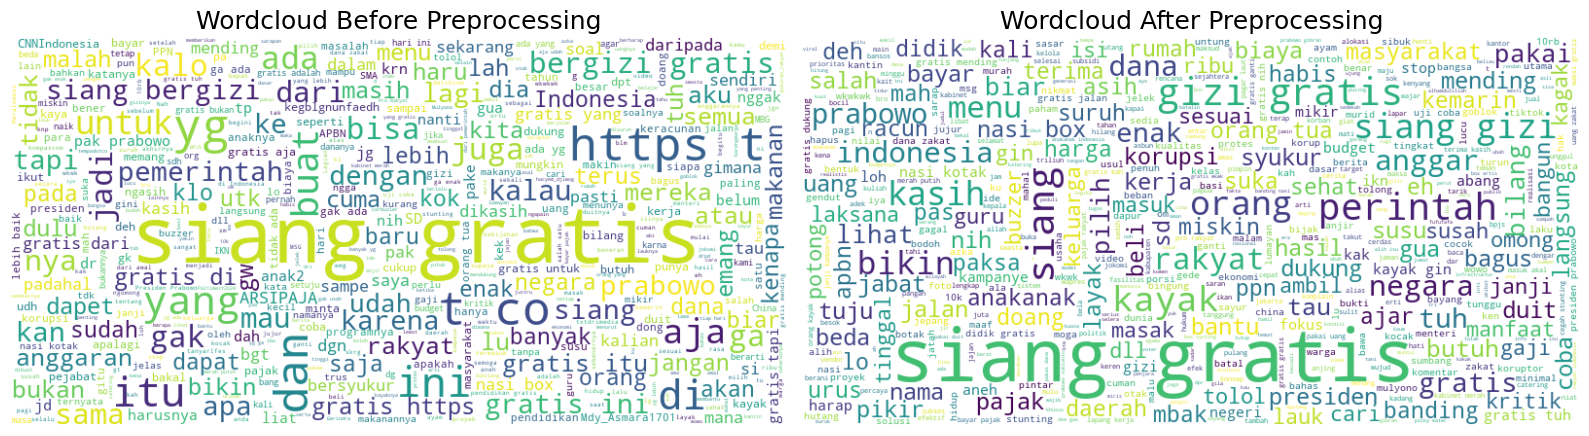

In [257]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['program', 'makan', 'anak', '...', 'amp','sekolah','bagi','balita', 'ya', 'gue', 'sih','banget','siswa'])

# WordCloud Before (dari kolom 'tweet')
text_before = ' '.join(data_mbg['tweet'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

# WordCloud After (dari kolom 'steming_data')
text_after = ' '.join(data_mbg['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


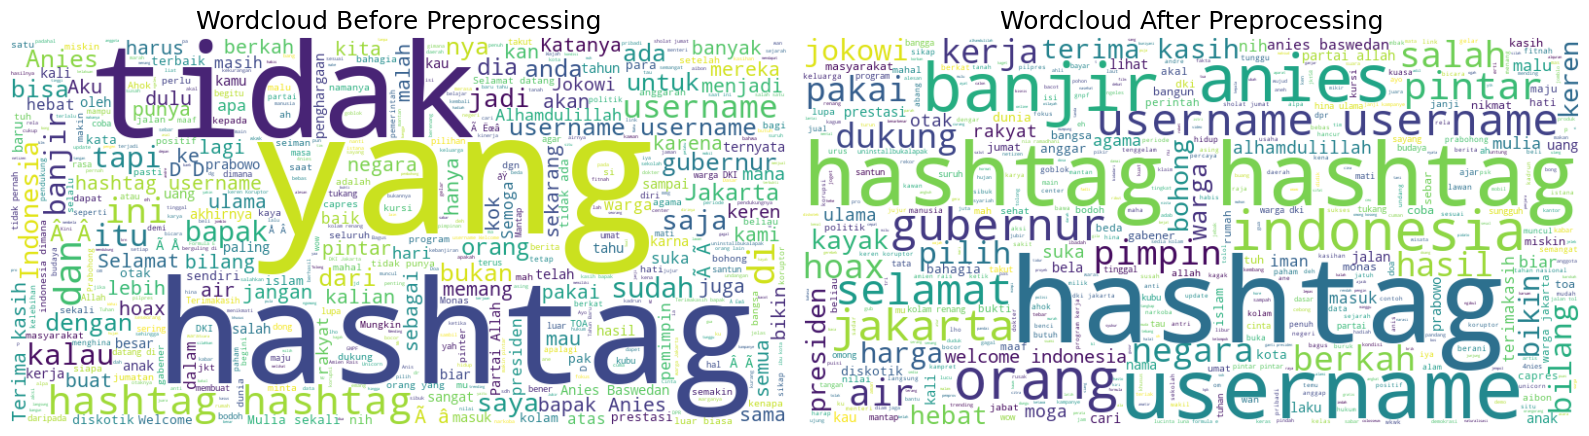

In [36]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['gw', 'lu', 'banget', '...', 'amp','bgt','gak','yg', 'ya', 'gue', 'sih','guys','aja'])

# WordCloud Before (dari kolom 'tweet')
text_before = ' '.join(data_sarc['tweet'].astype(str).tolist())
wc_before = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_before)

# WordCloud After (dari kolom 'steming_data')
text_after = ' '.join(data_sarc['steming_data'].astype(str).tolist())
wc_after = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400).generate(text_after)

# Visualisasi side-by-side
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wc_before, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud Before Preprocessing", fontsize=18)

plt.subplot(1, 2, 2)
plt.imshow(wc_after, interpolation='bilinear')
plt.axis("off")
plt.title("Wordcloud After Preprocessing", fontsize=18)

plt.tight_layout()
plt.show()


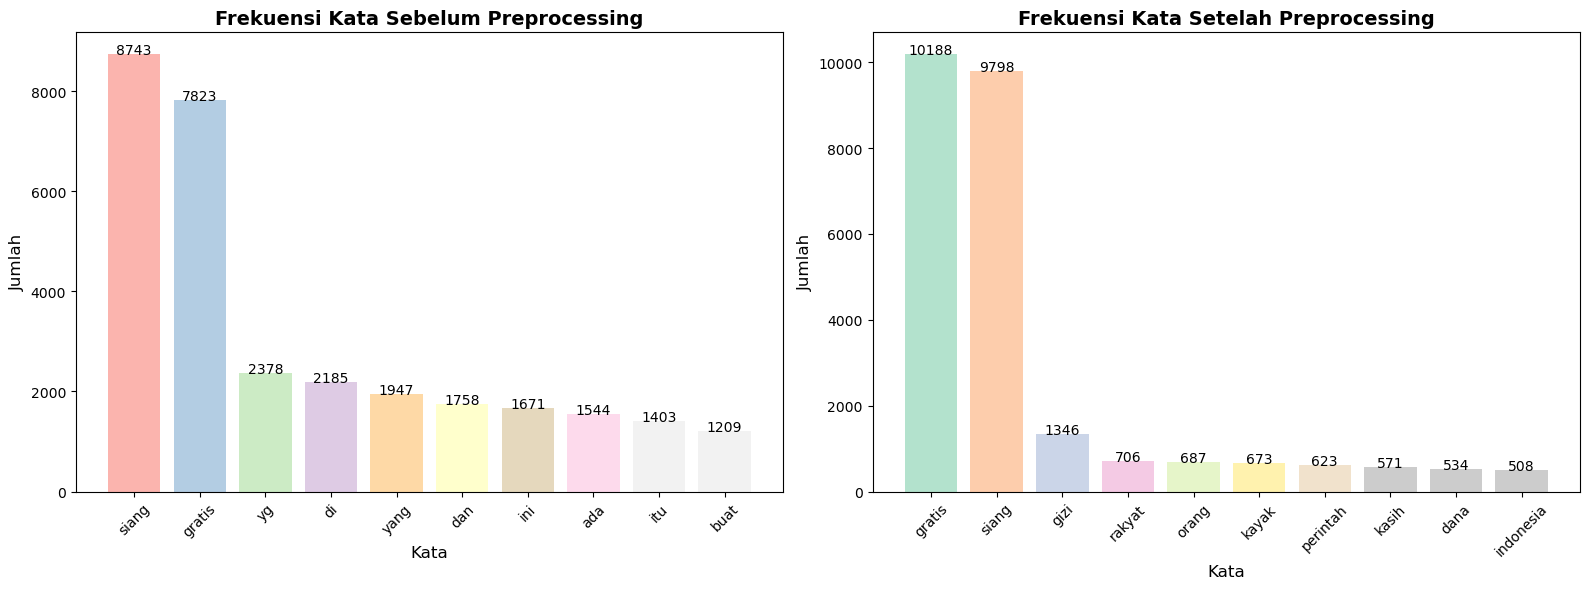

In [260]:
from collections import Counter

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['program', 'makan', 'anak', '...', 'amp','sekolah','bagi','balita', 'ya', 'gue', 'sih','banget','siswa'])

# BEFORE: kolom 'tweet'
all_text_before = ' '.join(data_mbg["tweet"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'steming_data'
all_text_after = ' '.join(data_mbg["steming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


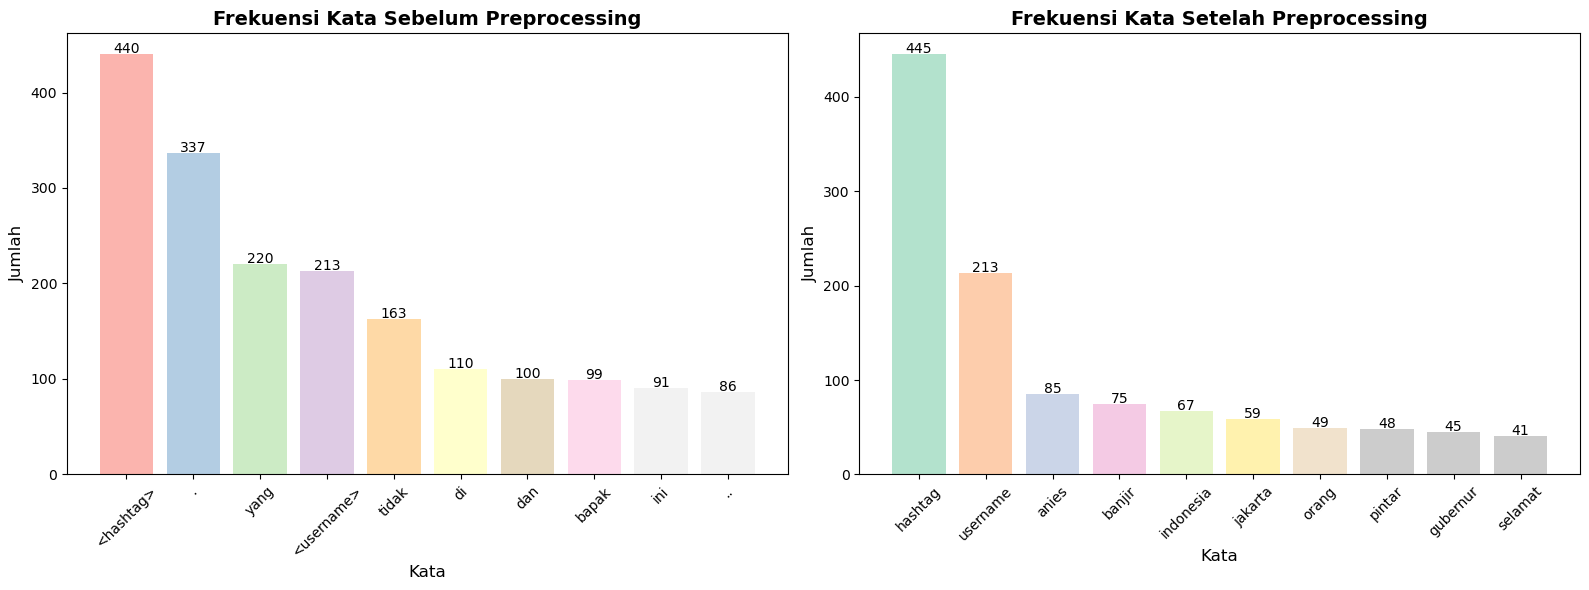

In [37]:
from collections import Counter

# Buat stopwords tambahan
stopwords = set(STOPWORDS)
stopwords.update(['gw', 'lu', 'banget', '...', 'amp','bgt','gak','yg', 'ya', 'gue', 'sih','guys','aja'])

# BEFORE: kolom 'tweet'
all_text_before = ' '.join(data_sarc["tweet"].astype(str))
words_before = all_text_before.split()
filtered_words_before = [word for word in words_before if word.lower() not in stopwords]
word_counts_before = Counter(filtered_words_before)
top_words_before = word_counts_before.most_common(10)
word_before, count_before = zip(*top_words_before)

# AFTER: kolom 'steming_data'
all_text_after = ' '.join(data_sarc["steming_data"].astype(str))
words_after = all_text_after.split()
filtered_words_after = [word for word in words_after if word.lower() not in stopwords]
word_counts_after = Counter(filtered_words_after)
top_words_after = word_counts_after.most_common(10)
word_after, count_after = zip(*top_words_after)

# Plot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# BEFORE Plot
colors_before = plt.cm.Pastel1(range(len(word_before)))
bars1 = axes[0].bar(word_before, count_before, color=colors_before)
axes[0].set_title("Frekuensi Kata Sebelum Preprocessing", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Kata", fontsize=12)
axes[0].set_ylabel("Jumlah", fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for bar, count in zip(bars1, count_before):
    axes[0].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

# AFTER Plot
colors_after = plt.cm.Pastel2(range(len(word_after)))
bars2 = axes[1].bar(word_after, count_after, color=colors_after)
axes[1].set_title("Frekuensi Kata Setelah Preprocessing", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Kata", fontsize=12)
axes[1].set_ylabel("Jumlah", fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for bar, count in zip(bars2, count_after):
    axes[1].text(bar.get_x() + bar.get_width()/2, count + 1, str(count), ha='center')

plt.tight_layout()
plt.show()


In [263]:
data_mbg.to_csv("data/datambg.csv", index=False)

In [38]:
data_sarc.to_csv("data/datasarc.csv", index=False)